# NLDB 2023

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import sys
import os
from os import path

sys.path.append("./../src")
tmp_path = path.join('.cache', '2022-10-13')
os.makedirs(tmp_path,exist_ok=True)

## Comparison graphics

  0%|          | 0/9 [00:00<?, ?it/s]

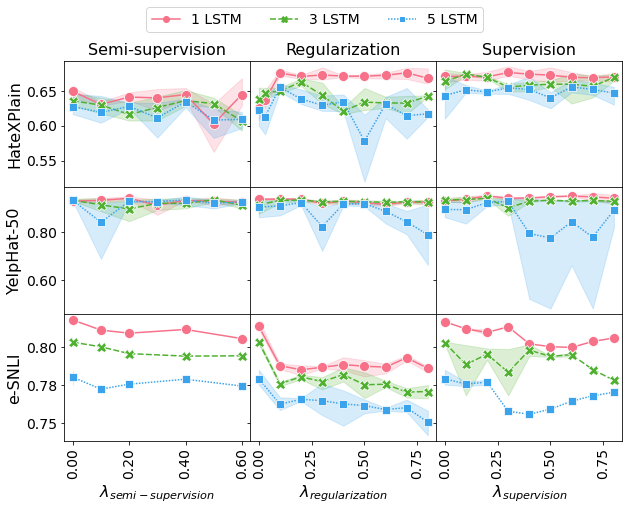

Image saved in .cache/2022-10-13/summary_fscore.png


In [2]:
from matplotlib.ticker import FormatStrFormatter

import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

summary_dir = '/Users/dunguyen/Developer/server_backup/historic/2022-10-05/summary'

experiments = [
    'lstm_attention_hatexplain_heuristic',
    'lstm_attention_hatexplain_entropy',
    'lstm_attention_hatexplain_supervise',
    
    'lstm_attention_yelp50_heuristic',
    'lstm_attention_yelp50_entropy',
    'lstm_attention_yelp50_supervise',
    
    'lstm_attention_esnli_heuristic',
    'lstm_attention_esnli_entropy',
    'lstm_attention_esnli_supervise',
]

techniques = {
    'entropy': 'regularization',
    'heuristic': 'semi-supervision',
    'supervise': 'supervision'
}

datasets = {
    'hatexplain': 'HateXPlain',
    'yelp50': 'YelpHat-50',
    'esnli': 'e-SNLI',
}

marker_map = {
    'heuristic':'o', 
    'supervise':'s', 
    'entropy':'X',
}

style_map = {
    'heuristic':'solid', 
    'supervise':'dotted', 
    'entropy':'dashed',
}

fig, axes = plt.subplots(3, 3, figsize=(10, 7), sharey='row')
row = 0
col = 0

for e in tqdm(experiments, total=len(experiments)):
    parquet_path = path.join(summary_dir, e, 'summary.parquet')
    summary = pd.read_parquet(parquet_path) 
    criteria = e.split('_')[-1]
    d_name = e.split('_')[-2]
    ax = axes[row][col]
    
    if 'n_context' in summary.columns: 
        summary['n_lstm'] = summary['n_context']
        
    summary = summary[summary[f'lambda_{criteria}'] <= 0.8]
    
    if criteria == 'heuristic':
        summary = summary[summary[f'lambda_{criteria}'] <= 0.6]
    
    if d_name == 'hatexplain':
        summary = summary[(summary[f'lambda_{criteria}'] == 0) | (summary[f'lambda_{criteria}'] == 0.03) | (summary[f'lambda_{criteria}'] >= 0.1)]
        
    summary['n_lstm'] = summary['n_lstm'].map(str) 
    
    summary = summary.sort_values('n_lstm')
    
    graphic = sns.lineplot(ax=ax, data=summary, x=f'lambda_{criteria}', y='y:fscore', 
                           hue='n_lstm', 
                           #hue_order=['1', '3', '5'],
                           #color=color_map[criteria],
                           style="n_lstm",
                           markers=True,
                           #markers={'1': 's', '3':'o', '5': 'X'},
                           #linestyle=style_map[criteria],
                           markersize=10,
                           palette='husl')

    
    t = techniques[criteria] 
    d = datasets[d_name]
    
    #graphic.tick_params(labelrotation=90)
    ax.tick_params(axis='x', rotation=90, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    #ax.set_title(f'{t} on {d}')
    #ax.set(ylabel='Plausibility(AUPRC)', xlabel='$\lambda$')
    
    col +=1
    if col > 2:
        col = 0
        row += 1
        
# set labels
axes[0][0].set_title('Semi-supervision',fontsize=16)
axes[0][1].set_title('Regularization',fontsize=16)
axes[0][2].set_title('Supervision',fontsize=16)


#axes[0][0].set_ylabel('HateXPlain',fontsize=16)
#axes[1][0].set_ylabel('YelpHat-50',fontsize=16)
#axes[2][0].set_ylabel('e-SNLI',fontsize=16)

axes[0][0].set_ylabel('HateXPlain',fontsize=16)
axes[1][0].set_ylabel('YelpHat-50',fontsize=16)
axes[2][0].set_ylabel('e-SNLI',fontsize=16)

axes[2][0].set_xlabel('$\lambda_{semi-supervision}$',fontsize=16)
axes[2][1].set_xlabel('$\lambda_{regularization}$',fontsize=16)
axes[2][2].set_xlabel('$\lambda_{supervision}$',fontsize=16)

fig.subplots_adjust(hspace=0, wspace=0)

lines, labels = axes[0][0].get_legend_handles_labels() 

labels = [l+' LSTM' for l in labels]


fig.legend(lines, labels, loc='upper center', ncol=3, fontsize=14)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        
        
plt.savefig(path.join(tmp_path, 'summary_fscore.png'), bbox_inches="tight", dpi=300)
plt.show()
print('Image saved in',path.join(tmp_path, 'summary_fscore.png'))

  0%|          | 0/9 [00:00<?, ?it/s]

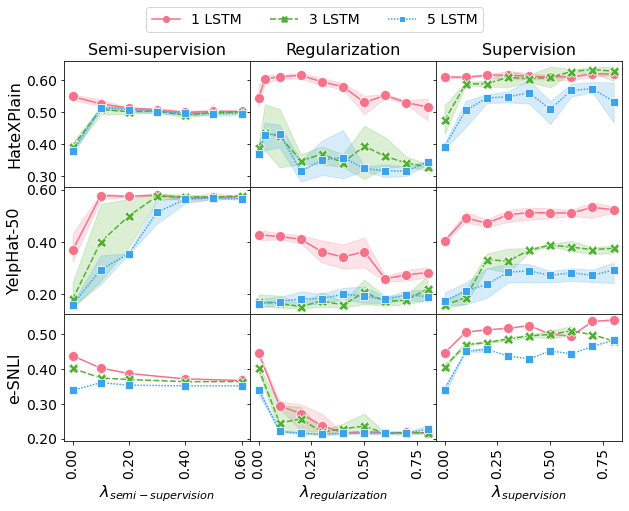

Image saved in .cache/2022-10-13/summary_auprc.png


In [3]:
from matplotlib.ticker import FormatStrFormatter
fig, axes = plt.subplots(3, 3, figsize=(10, 7), sharey='row')
row = 0
col = 0

for e in tqdm(experiments, total=len(experiments)):
    parquet_path = path.join(summary_dir, e, 'summary.parquet')
    summary = pd.read_parquet(parquet_path) 
    criteria = e.split('_')[-1]
    d_name = e.split('_')[-2]
    ax = axes[row][col]
    
    if 'n_context' in summary.columns: 
        summary['n_lstm'] = summary['n_context']
        
    summary = summary[summary[f'lambda_{criteria}'] <= 0.8]
    
    if criteria == 'heuristic':
        summary = summary[summary[f'lambda_{criteria}'] <= 0.6]
    
    if d_name == 'hatexplain':
        summary = summary[(summary[f'lambda_{criteria}'] == 0) | (summary[f'lambda_{criteria}'] == 0.03) | (summary[f'lambda_{criteria}'] >= 0.1)]
        
    summary['n_lstm'] = summary['n_lstm'].map(str) 
    
    summary = summary.sort_values('n_lstm')
    
    graphic = sns.lineplot(ax=ax, data=summary, x=f'lambda_{criteria}', y='a:AUPRC', 
                           hue='n_lstm', 
                           #hue_order=['1', '3', '5'],
                           #color=color_map[criteria],
                           style="n_lstm",
                           #markers={'1': 's', '3':'o', '5': 'X'},
                           markers=True,
                           #linestyle=style_map[criteria],
                           markersize=10,
                           palette='husl')
    
    t = techniques[criteria] 
    d = datasets[d_name]
    
    #graphic.tick_params(labelrotation=90)
    ax.tick_params(axis='x', rotation=90, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    #ax.set_title(f'{t} on {d}')
    #ax.set(ylabel='Plausibility(AUPRC)', xlabel='$\lambda$')
    
    col +=1
    if col > 2:
        col = 0
        row += 1
        
# set labels
axes[0][0].set_title('Semi-supervision',fontsize=16)
axes[0][1].set_title('Regularization',fontsize=16)
axes[0][2].set_title('Supervision',fontsize=16)

axes[0][0].set_ylabel('HateXPlain',fontsize=16)
axes[1][0].set_ylabel('YelpHat-50',fontsize=16)
axes[2][0].set_ylabel('e-SNLI',fontsize=16)

axes[2][0].set_xlabel('$\lambda_{semi-supervision}$',fontsize=16)
axes[2][1].set_xlabel('$\lambda_{regularization}$',fontsize=16)
axes[2][2].set_xlabel('$\lambda_{supervision}$',fontsize=16)

# no space between subfig
fig.subplots_adjust(hspace=0, wspace=0)

# make legend
lines, labels = axes[0][0].get_legend_handles_labels() 
labels = [l+' LSTM' for l in labels]
fig.legend(lines, labels, loc='upper center', ncol=3, fontsize=14)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        
        
plt.savefig(path.join(tmp_path, 'summary_auprc.png'), bbox_inches="tight", dpi=300)
plt.show()
print('Image saved in',path.join(tmp_path, 'summary_auprc.png'))

In [4]:
#grouped = summary[summary[]]
grouped = summary.groupby(['data', 'n_lstm', 'lambda_supervise'])

# Select all metric columns
metrics = ['a:AUPRC', 'y:fscore']

# Apply the operation to all metric columns
df_new = grouped[metrics].agg(lambda x: f'{x.mean():.3f} ± {1.95 * x.sem():.3f}')

df_new

a:AUPRC       y:fscore
data  n_lstm lambda_supervise                              
esnli 1      0.0                 0.446 ± nan    0.817 ± nan
             0.1               0.506 ± 0.000  0.812 ± 0.000
             0.2               0.513 ± 0.003  0.810 ± 0.003
             0.3                 0.517 ± nan    0.813 ± nan
             0.4                 0.525 ± nan    0.802 ± nan
             0.5                 0.500 ± nan    0.800 ± nan
             0.6                 0.495 ± nan    0.800 ± nan
             0.7               0.537 ± 0.003  0.804 ± 0.005
             0.8                 0.541 ± nan    0.806 ± nan
      3      0.0               0.407 ± 0.004  0.803 ± 0.001
             0.1               0.471 ± 0.006  0.788 ± 0.020
             0.2               0.476 ± 0.001  0.795 ± 0.007
             0.3               0.487 ± 0.010  0.783 ± 0.030
             0.4               0.496 ± 0.006  0.798 ± 0.007
             0.5               0.500 ± 0.021  0.794 ± 0.001
             0.6               0.510 ± 0.027  0.795 ± 0.002
             0.7                 0.499 ± nan    0.785 ± nan
             0.8                 0.481 ± nan    0.778 ± nan
      5      0.0               0.341 ± 0.014  0.779 ± 0.006
             0.1               0.451 ± 0.003  0.776 ± 0.003
             0.2               0.457 ± 0.013  0.777 ± 0.003
             0.3                 0.438 ± nan    0.758 ± nan
             0.4                 0.429 ± nan    0.756 ± nan
             0.5                 0.452 ± nan    0.759 ± nan
             0.6                 0.444 ± nan    0.764 ± nan
             0.7                 0.466 ± nan    0.768 ± nan
             0.8                 0.483 ± nan    0.770 ± nan

## 1 layer

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey='row')
row = 0
col = 0

for e in experiments:
    parquet_path = path.join(summary_dir, e, 'summary.parquet')
    summary = pd.read_parquet(parquet_path)
    summary = summary[summary['n_lstm'] == 1]
    criteria = e.split('_')[-1]
    d_name = e.split('_')[-2]
    ax = axes[row][col]
    
    summary = summary[(summary['lambda_entropy'] >= 0.1) | (summary['lambda_entropy'] == 0.)]
    
    graphic = sns.pointplot(ax=ax, data=summary, x=f'lambda_{criteria}', y='a:AUPRC',
                            errwidth=2, 
                            capsize=0.1, 
                            dodge=True, 
                            scale=0.5,
                            color='red')
    
    t = techniques[criteria] 
    d = datasets[d_name]
    ax.set_title(f'{t} on {d}')
    
    ax.set(ylabel='Plausibility(AUPRC)', xlabel='$\lambda$')
    
    col +=1
    if col > 2:
        col = 0
        row += 1
        
# set labels
#axes[0][0].set_title('HateXPLain')
#axes[0][1].set_title('YelpHat-50')
plt.savefig(path.join(tmp_path, 'summary_auprc_1layer.png'), bbox_inches="tight")
plt.show()

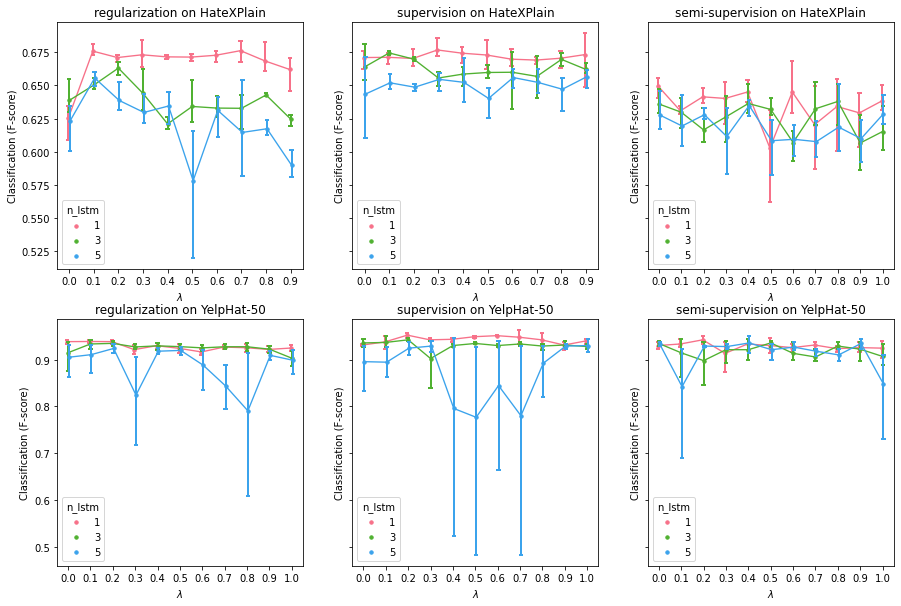

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey='row')
row = 0
col = 0

for e in experiments:
    parquet_path = path.join(summary_dir, e, 'summary.parquet')
    summary = pd.read_parquet(parquet_path) 
    criteria = e.split('_')[-1]
    d_name = e.split('_')[-2]
    ax = axes[row][col]
    
    summary = summary[(summary['lambda_entropy'] >= 0.1) | (summary['lambda_entropy'] == 0.)]
    
    graphic = sns.pointplot(ax=ax, data=summary, x=f'lambda_{criteria}', y='y:fscore', hue='n_lstm', 
                            errwidth=2, 
                            capsize=0.1, 
                            dodge=True, 
                            scale=0.5,
                            palette='husl')
    
    t = techniques[criteria] 
    d = datasets[d_name]
    ax.set_title(f'{t} on {d}')
    
    ax.set(ylabel='Classification (F-score)', xlabel='$\lambda$')
    
    col +=1
    if col > 2:
        col = 0
        row += 1
        
plt.savefig(path.join(tmp_path, 'summary_fscore.png'), bbox_inches="tight")
plt.show()

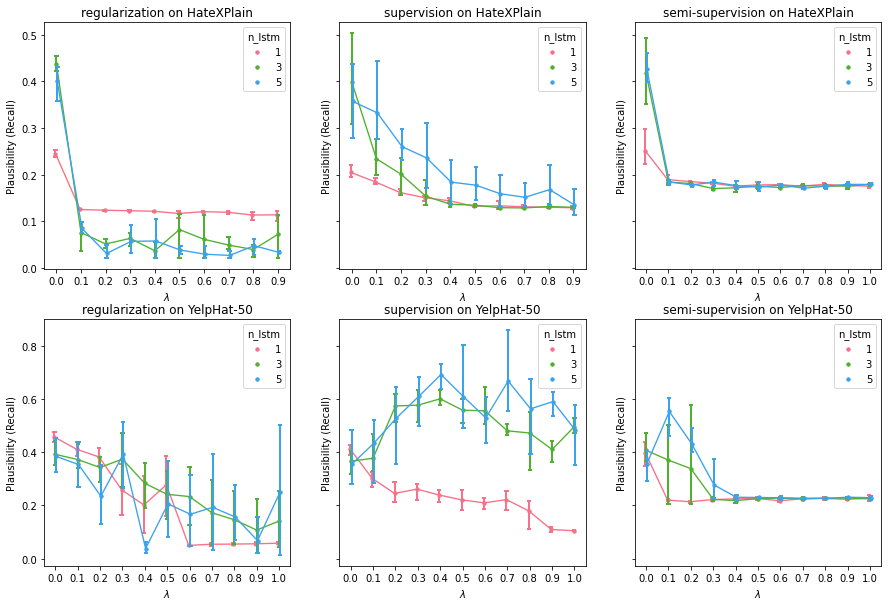

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey='row')
row = 0
col = 0

for e in experiments:
    parquet_path = path.join(summary_dir, e, 'summary.parquet')
    summary = pd.read_parquet(parquet_path) 
    criteria = e.split('_')[-1]
    d_name = e.split('_')[-2]
    ax = axes[row][col]
    
    summary = summary[(summary['lambda_entropy'] >= 0.1) | (summary['lambda_entropy'] == 0.)]
    
    graphic = sns.pointplot(ax=ax, data=summary, x=f'lambda_{criteria}', y='a:Recall', hue='n_lstm', 
                            errwidth=2, 
                            capsize=0.1, 
                            dodge=True, 
                            scale=0.5,
                            palette='husl')
    
    t = techniques[criteria] 
    d = datasets[d_name]
    ax.set_title(f'{t} on {d}')
    
    ax.set(ylabel='Plausibility (Recall)', xlabel='$\lambda$')
    
    col +=1
    if col > 2:
        col = 0
        row += 1
        
plt.savefig(path.join(tmp_path, 'summary_recall.png'), bbox_inches="tight")
plt.show()

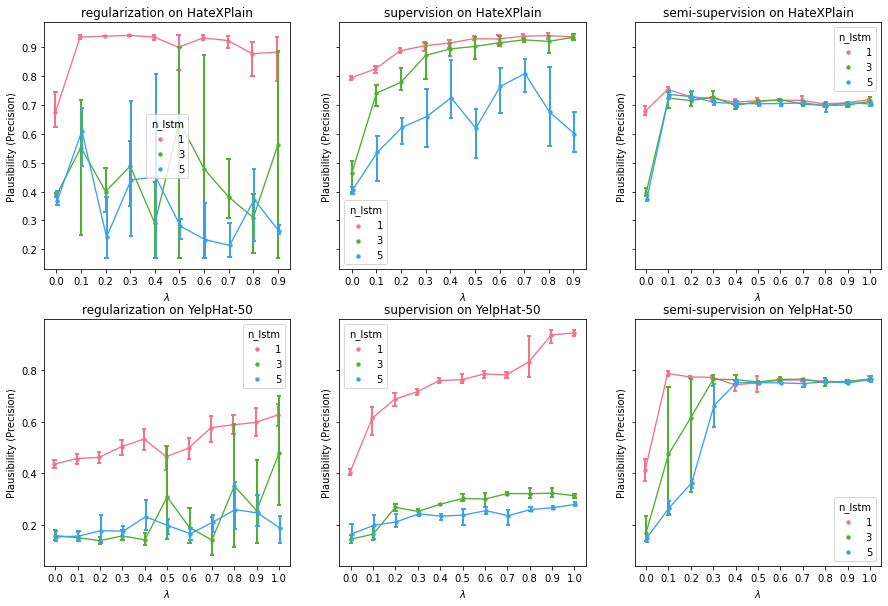

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey='row')
row = 0
col = 0

for e in experiments:
    parquet_path = path.join(summary_dir, e, 'summary.parquet')
    summary = pd.read_parquet(parquet_path) 
    criteria = e.split('_')[-1]
    d_name = e.split('_')[-2]
    ax = axes[row][col]
    
    summary = summary[(summary['lambda_entropy'] >= 0.1) | (summary['lambda_entropy'] == 0.)]
    
    graphic = sns.pointplot(ax=ax, data=summary, x=f'lambda_{criteria}', y='a:Precision', hue='n_lstm', 
                            errwidth=2, 
                            capsize=0.1, 
                            dodge=True, 
                            scale=0.5,
                            palette='husl')
    
    t = techniques[criteria] 
    d = datasets[d_name]
    ax.set_title(f'{t} on {d}')
    
    ax.set(ylabel='Plausibility (Precision)', xlabel='$\lambda$')
    
    col +=1
    if col > 2:
        col = 0
        row += 1
        
plt.savefig(path.join(tmp_path, 'summary_precision.png'), bbox_inches="tight")
plt.show()

## Individual save figure

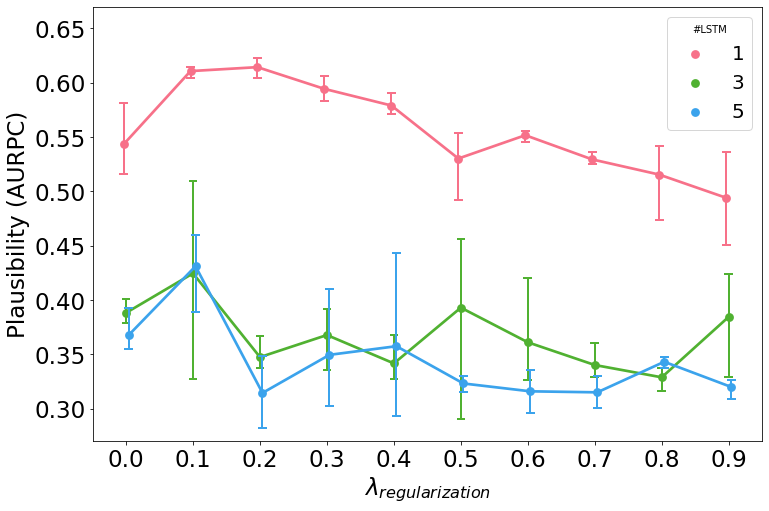

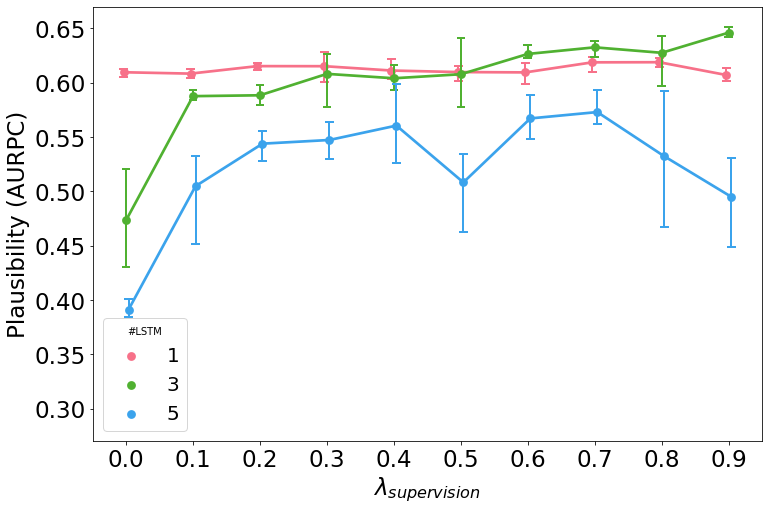

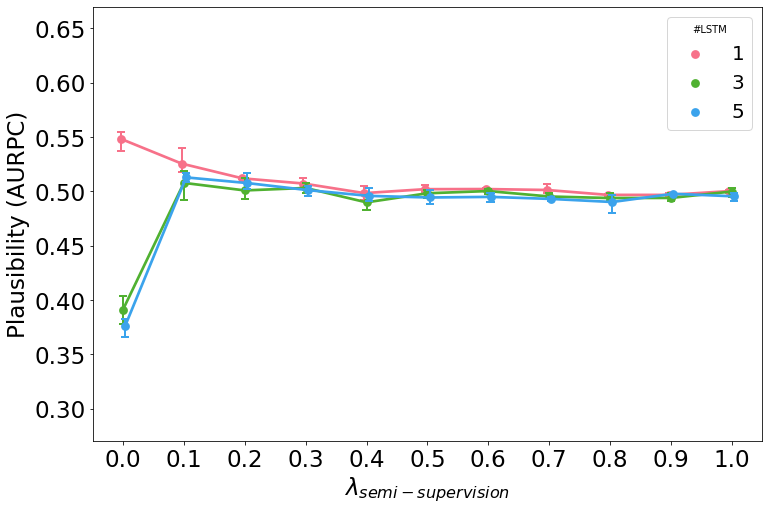

In [15]:
row = 0
col = 0

experiments = [
    'lstm_attention_hatexplain_entropy',
    'lstm_attention_hatexplain_supervise',
    'lstm_attention_hatexplain_heuristic',
    #'lstm_attention_yelp50_entropy',
    #'lstm_attention_yelp50_supervise',
    #'lstm_attention_yelp50_heuristic',
]

# ylim = (0.1, 0.6)
ylim = (0.27, 0.67)

techniques = {
    'entropy': 'regularization',
    'heuristic': 'semi-supervision',
    'supervise': 'supervision'
}

datasets = {
    'hatexplain': 'HateXPlain',
    'yelp50': 'YelpHat-50'
}

#plt.rcParams.update({'font.size': 25})
plt.rc('axes', titlesize=23)     # fontsize of the axes title
plt.rc('axes', labelsize=23)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
for e in experiments:
    fig = plt.figure(figsize=(12, 8), clear=True)
    parquet_path = path.join(summary_dir, e, 'summary.parquet')
    summary = pd.read_parquet(parquet_path) 
    criteria = e.split('_')[-1]
    d_name = e.split('_')[-2]
    t = techniques[criteria] 
    d = datasets[d_name]
    
    summary = summary[(summary['lambda_entropy'] >= 0.1) | (summary['lambda_entropy'] == 0.)]
    
    sns.axes_style()
    ax = sns.pointplot(data=summary, x=f'lambda_{criteria}', y='a:AUPRC', hue='n_lstm', 
                            errwidth=2, 
                            capsize=0.1, 
                            dodge=True, 
                            #scale=0.5,
                            palette='husl')
    
    
    ax.set_ylim(ylim)
    ax.set(ylabel='Plausibility (AURPC)', xlabel='$\lambda_{' + t + '}$')
    ax.legend(title='#LSTM')
    plt.savefig(path.join(tmp_path, f'auprc_{d_name}_{criteria}.png'), bbox_inches="tight")
    #plt.close(fig)
    #plt.show()

## New results

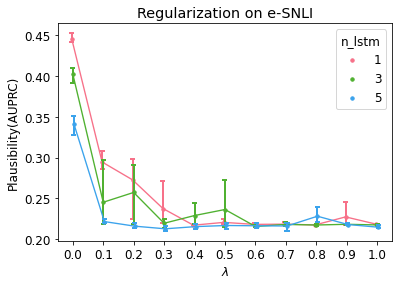

In [297]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

summary_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-10-05/summary'
summary = pd.read_parquet(path.join(summary_dir, 'lstm_attention_esnli_entropy', 'summary.parquet'))

graphic = sns.pointplot(data=summary, x=f'lambda_entropy', y='a:AUPRC', hue='n_lstm', 
                        errwidth=2, 
                        capsize=0.1, 
                        dodge=True, 
                        scale=0.5,
                        palette='husl')

graphic.set_title(f'Regularization on e-SNLI')

graphic.set(ylabel='Plausibility(AUPRC)', xlabel='$\lambda$')
plt.show()

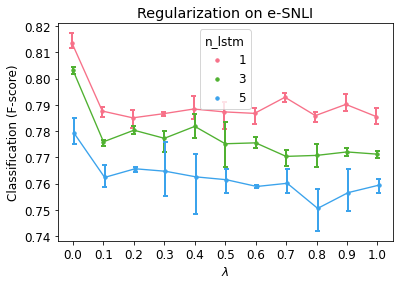

In [170]:
graphic = sns.pointplot(data=summary, x=f'lambda_entropy', y='y:fscore', hue='n_lstm', 
                        errwidth=2, 
                        capsize=0.1, 
                        dodge=True, 
                        scale=0.5,
                        palette='husl')

graphic.set_title(f'Regularization on e-SNLI')

graphic.set(ylabel='Classification (F-score)', xlabel='$\lambda$')
plt.show()

## Compare techniques

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
colors = sns.color_palette("husl", 3)

In [7]:
summary_dir = '/Users/dunguyen/Developer/server_backup/historic/2023-02-23/summary'
compare_dir = path.join(summary_dir, 'objective_learning', 'compare_techniques')

report_metrics = [
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)'},
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)'},
]

summary = pd.DataFrame()

for dataset in ['hatexplain', 'yelphat50', 'esnli']:
    
    # Load summary of each type of dataset
    summary_regularization = pd.read_parquet(path.join(compare_dir, 'regularization', dataset, 'summary.parquet'))
    summary_supervision = pd.read_parquet(path.join(compare_dir, 'supervision', dataset, 'summary.parquet'))
    summary_semisupervision = pd.read_parquet(path.join(compare_dir, 'semi_supervision', dataset, 'summary.parquet'))
    
    # Find lambda
    summary_semisupervision['lambda'] = summary_semisupervision['lambda_heuristic']
    summary_supervision['lambda'] = summary_supervision['lambda_supervise']
    summary_regularization['lambda'] = summary_regularization['lambda_entropy']
    
    # Correct metric name

    
    # Attribute technique
    summary_semisupervision['Technique'] = 'Semi-supervision'
    summary_supervision['Technique'] = 'Supervision'
    summary_regularization['Technique'] = 'Regularization'
    
    # Fusion
    summary_dataset = pd.concat([summary_semisupervision, summary_regularization, summary_supervision])
    summary_dataset['data'] = dataset
    
    summary = pd.concat([summary, summary_dataset])
    
summary = summary[['data', 'lambda', 'Technique', 'a:AUPRC', 'a:AURecall', 'a:Recall', 'a:Specificity', 'y:fscore']]
summary.loc[summary['a:Recall'].isna() , 'a:Recall'] = summary.loc[summary['a:Recall'].isna() , 'a:AURecall']

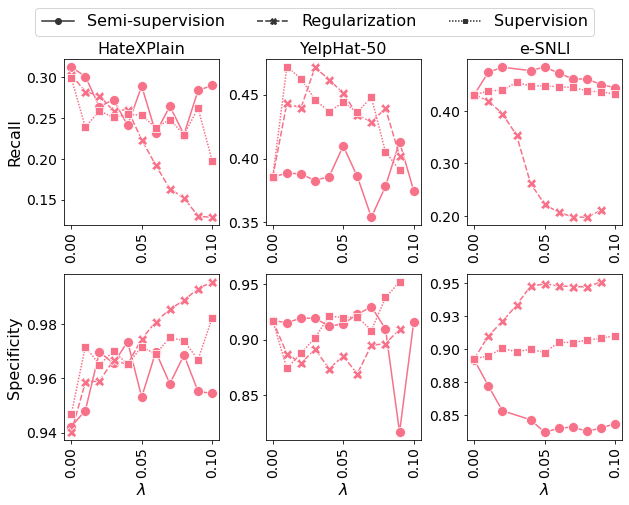

Image saved in .cache/2022-10-13/compare_recall_specificity.png


In [8]:
from matplotlib.ticker import FormatStrFormatter
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
col = 0
row = 0

datasets = ['hatexplain', 'yelphat50', 'esnli']

report_metrics = [
    {'y': 'a:Recall', 'ylabel': 'a:Recall' },
    {'y': 'a:Specificity', 'ylabel': 'a:Specificity' },
    #{'y': 'a:AUPRC', 'ylabel': 'a:Specificity' },
    #{'y': 'y:fscore', 'ylabel': 'a:Recall' },
]


for metric in report_metrics:
    
    for dataset in datasets:
        
        data = summary[summary['data'] == dataset]
        data = data[data['lambda'] * 1000 % 10 == 0]
        
        ax = axes[row][col]
        col +=1
        if col > 2:
            col = 0
            row += 1

        graphic = sns.lineplot(ax=ax, data=data, x=f'lambda', y=metric['y'], 
                               color=colors[0],
                               markers=True, 
                               style='Technique', 
                               markersize=10,
                                errorbar=None,
                              )


        #graphic.tick_params(labelrotation=90)
        ax.tick_params(axis='x', rotation=90, labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
        
# set labels
axes[0][0].set_title('HateXPlain',fontsize=16)
axes[0][1].set_title('YelpHat-50',fontsize=16)
axes[0][2].set_title('e-SNLI',fontsize=16)

#axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
#axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)

axes[0][0].set_ylabel('Recall',fontsize=16)
axes[1][0].set_ylabel('Specificity',fontsize=16)


axes[0][1].set_ylabel('',fontsize=16)
axes[1][1].set_ylabel('',fontsize=16)

axes[0][2].set_ylabel('',fontsize=16)
axes[1][2].set_ylabel('',fontsize=16)



axes[0][0].set_xlabel('')
axes[0][1].set_xlabel('')
axes[0][2].set_xlabel('')
axes[1][0].set_xlabel('$\lambda$',fontsize=16)
axes[1][1].set_xlabel('$\lambda$',fontsize=16)
axes[1][2].set_xlabel('$\lambda$',fontsize=16)

# no space between subfig
fig.subplots_adjust(hspace=.3, wspace=.3)

# make legend
lines, labels = axes[0][0].get_legend_handles_labels() 
fig.legend(lines, labels, loc='upper center', ncol=3, fontsize=16)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        
plt.savefig(path.join(tmp_path, 'compare_recall_specificity.png'), bbox_inches="tight", dpi=300)
plt.show()
print('Image saved in',path.join(tmp_path, 'compare_recall_specificity.png'))

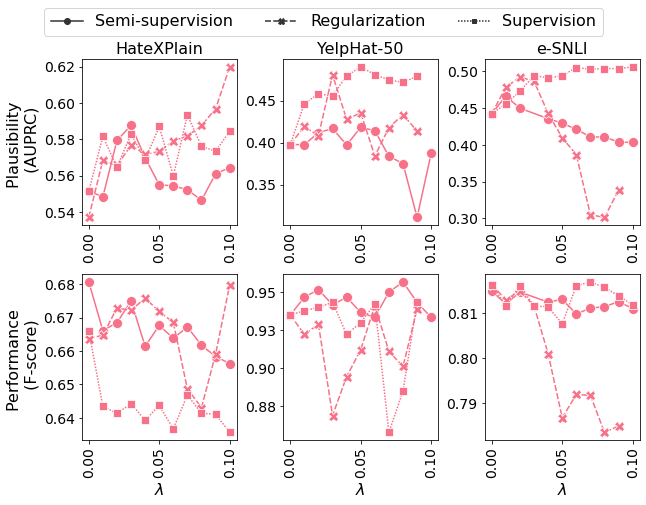

Image saved in .cache/2022-10-13/compare_fscore_auprc.png


In [9]:
from matplotlib.ticker import FormatStrFormatter
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
col = 0
row = 0

datasets = ['hatexplain', 'yelphat50', 'esnli']

report_metrics = [
    #{'y': 'a:Recall', 'ylabel': 'a:Recall' },
    #{'y': 'a:Specificity', 'ylabel': 'a:Specificity' },
    {'y': 'a:AUPRC', 'ylabel': 'a:Specificity' },
    {'y': 'y:fscore', 'ylabel': 'a:Recall' },
]


for metric in report_metrics:
    
    for dataset in datasets:
        
        data = summary[summary['data'] == dataset]
        data = data[data['lambda'] * 1000 % 10 == 0]
        
        ax = axes[row][col]
        col +=1
        if col > 2:
            col = 0
            row += 1

        graphic = sns.lineplot(ax=ax, data=data, x=f'lambda', y=metric['y'], 
                               color=colors[0],
                               markers=True, 
                               style='Technique', 
                               markersize=10,
                                errorbar=None,
                              )


        #graphic.tick_params(labelrotation=90)
        ax.tick_params(axis='x', rotation=90, labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
        
# set labels
axes[0][0].set_title('HateXPlain',fontsize=16)
axes[0][1].set_title('YelpHat-50',fontsize=16)
axes[0][2].set_title('e-SNLI',fontsize=16)

#axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
#axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)

axes[0][0].set_ylabel('Plausibility \n (AUPRC)',fontsize=16)
axes[1][0].set_ylabel('Performance \n (F-score)',fontsize=16)


axes[0][1].set_ylabel('',fontsize=16)
axes[1][1].set_ylabel('',fontsize=16)

axes[0][2].set_ylabel('',fontsize=16)
axes[1][2].set_ylabel('',fontsize=16)



axes[0][0].set_xlabel('')
axes[0][1].set_xlabel('')
axes[0][2].set_xlabel('')
axes[1][0].set_xlabel('$\lambda$',fontsize=16)
axes[1][1].set_xlabel('$\lambda$',fontsize=16)
axes[1][2].set_xlabel('$\lambda$',fontsize=16)

# no space between subfig
fig.subplots_adjust(hspace=.3, wspace=.3)

# make legend
lines, labels = axes[0][0].get_legend_handles_labels() 
fig.legend(lines, labels, loc='upper center', ncol=3, fontsize=16)

for ax in axes:
    for a in ax:
        a.get_legend().remove()
        
plt.savefig(path.join(tmp_path, 'compare_fscore_auprc.png'), bbox_inches="tight", dpi=300)
plt.show()
print('Image saved in',path.join(tmp_path, 'compare_fscore_auprc.png'))

Individual plot

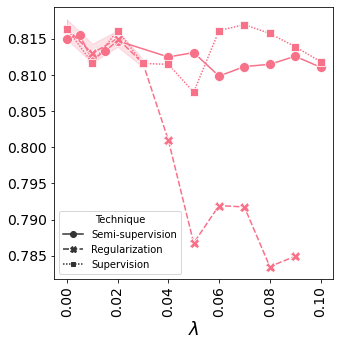

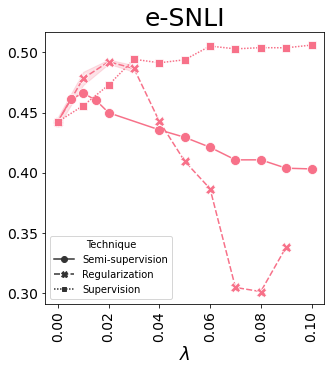

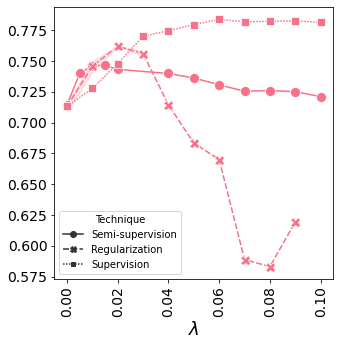

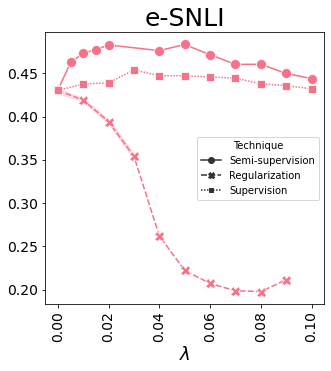

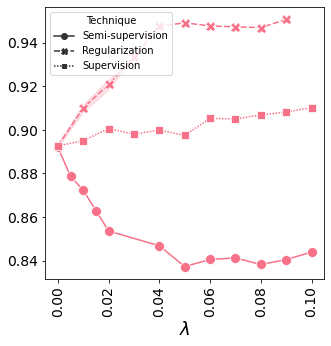

In [4]:
summary_dir = '/Users/dunguyen/Developer/server_backup/historic/2023-02-23/summary'
compare_dir = path.join(summary_dir, 'objective_learning', 'compare_techniques')

summary_regularization = pd.read_parquet(path.join(compare_dir, 'regularization', 'esnli', 'summary.parquet'))
summary_supervision = pd.read_parquet(path.join(compare_dir, 'supervision', 'esnli', 'summary.parquet'))
summary_semisupervision = pd.read_parquet(path.join(compare_dir, 'semi_supervision', 'esnli', 'summary.parquet'))


summary_semisupervision['lambda'] = summary_semisupervision['lambda_heuristic']
summary_semisupervision = summary_semisupervision[['data', 'lambda', 'a:AUPRC', 'a:AUROC', 'a:Precision', 'a:Recall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_semisupervision['Technique'] = 'Semi-supervision'

summary_supervision['lambda'] = summary_supervision['lambda_supervise']
summary_supervision = summary_supervision[['data', 'lambda', 'a:AUPRC', 'a:AUROC', 'a:Precision', 'a:Recall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_supervision['Technique'] = 'Supervision'

summary_regularization['lambda'] = summary_regularization['lambda_entropy']
summary_regularization = summary_regularization[['data', 'lambda', 'a:AUPRC', 'a:AUROC', 'a:Precision', 'a:Recall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_regularization['Technique'] = 'Regularization'

summary = pd.concat([summary_semisupervision, summary_regularization, summary_supervision])

dataset_fname = 'esnli'
dataset_title = 'e-SNLI'

report_metrics = [
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' , 'fname': f'fscore_{dataset_fname}.png'},
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' , 'fname': f'auprc_{dataset_fname}.png'},
    {'y': 'a:AUROC', 'ylabel': 'Plausibility (AUROC)' , 'fname': f'auroc_{dataset_fname}.png'},
    {'y': 'a:Recall', 'ylabel': 'Recall of attention map' , 'fname': f'recall_{dataset_fname}.png'},
    {'y': 'a:Specificity', 'ylabel': 'Specificity of attention map' , 'fname': f'specificity_{dataset_fname}.png'},
]

for metric in report_metrics:
    fig = plt.figure(figsize=(5, 5), clear=True)
    
    #graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], hue='Technique', 
    #                       marker='o',
    #                       markersize=10,
    #                        palette='husl')
    
    graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], color=colors[0], 
                           markers=True, style='Technique', markersize=10)

    if metric['y'] in ['a:AUPRC', 'a:Recall']:
        graphic.set_title(dataset_title, fontdict={'fontsize':25})
        
    plt.xlabel('$\lambda$', fontsize=18)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    
    #plt.ylabel(metric['ylabel'], fontsize=18)
    plt.ylabel('', fontsize=18)
    plt.savefig(path.join(tmp_path, metric['fname']), bbox_inches="tight")
    plt.show()

In [10]:
summary_regularization[summary_regularization['lambda'] == 0]['a:AUPRC']

run=1_esnli_lstm=1_lheuris=0.0    0.438401
run=2_esnli_lstm=1_lheuris=0.0    0.446225
run=0_esnli_lstm=1_lheuris=0.0    0.442453
Name: a:AUPRC, dtype: float64

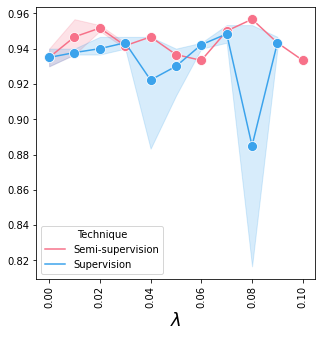

Figure saved in .cache/2022-10-13/fscore_esnli.png


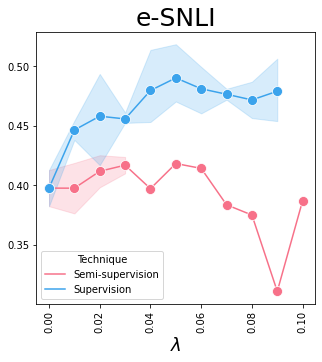

Figure saved in .cache/2022-10-13/auprc_esnli.png


ValueError: Could not interpret value `a:AUROC` for parameter `y`

<Figure size 360x360 with 0 Axes>

In [ ]:
## Debug with legacy results
summary = pd.concat([summary_semisupervision, summary_supervision])

dataset_fname = 'esnli'
dataset_title = 'e-SNLI'

report_metrics = [
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' , 'fname': f'fscore_{dataset_fname}.png'},
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' , 'fname': f'auprc_{dataset_fname}.png'},
    {'y': 'a:AUROC', 'ylabel': 'Plausibility (AUROC)' , 'fname': f'auroc_{dataset_fname}.png'},
    {'y': 'a:Recall', 'ylabel': 'Recall of attention map' , 'fname': f'recall_{dataset_fname}.png'},
    {'y': 'a:Specificity', 'ylabel': 'Specificity of attention map' , 'fname': f'specificity_{dataset_fname}.png'},
]

for metric in report_metrics:
    fig = plt.figure(figsize=(5, 5), clear=True)
    graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], hue='Technique', 
                           marker='o',
                           markersize=10,
                            palette=[colors[0], colors[2]])

    if metric['y'] in ['a:AUPRC', 'a:Recall']:
        graphic.set_title(dataset_title, fontdict={'fontsize':25})
    plt.xlabel('$\lambda$', fontsize=18)
    plt.xticks(rotation=90)
    plt.ylabel(metric['ylabel'], fontsize=18)
    plt.savefig(path.join(tmp_path, metric['fname']), bbox_inches="tight")
    plt.show()
    print(f'Figure saved in {path.join(tmp_path, metric["fname"])}')

### HateXPlain

<Figure size 432x360 with 0 Axes>

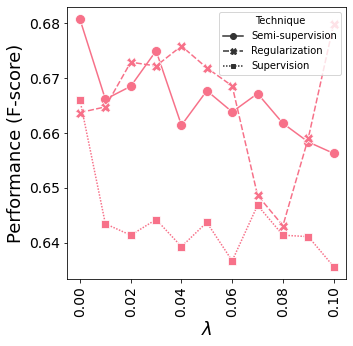

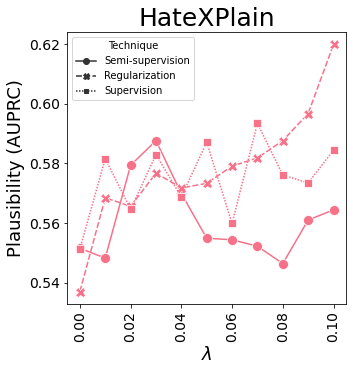

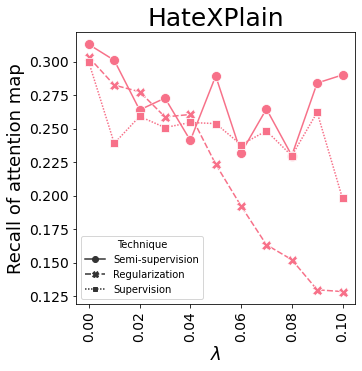

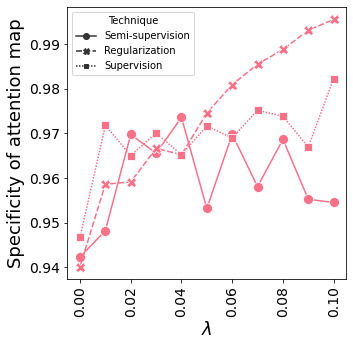

In [68]:
summary_semisupervision = pd.read_parquet(path.join(compare_dir, 'semi_supervision', 'hatexplain', 'summary.parquet'))
summary_supervision = pd.read_parquet(path.join(compare_dir, 'supervision', 'hatexplain', 'summary.parquet'))
summary_regularization = pd.read_parquet(path.join(compare_dir, 'regularization', 'hatexplain', 'summary.parquet'))

summary_semisupervision['lambda'] = summary_semisupervision['lambda_heuristic']
summary_semisupervision = summary_semisupervision[['data', 'lambda', 'a:AUPRC', 'a:AUPrecision', 'a:AURecall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_semisupervision['Technique'] = 'Semi-supervision'

summary_supervision['lambda'] = summary_supervision['lambda_supervise']
summary_supervision = summary_supervision[['data', 'lambda', 'a:AUPRC', 'a:AUPrecision', 'a:AURecall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_supervision['Technique'] = 'Supervision'

summary_regularization['lambda'] = summary_regularization['lambda_entropy']
summary_regularization = summary_regularization[['data', 'lambda', 'a:AUPRC', 'a:AUPrecision', 'a:AURecall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_regularization['Technique'] = 'Regularization'

summary = pd.concat([summary_semisupervision, summary_regularization, summary_supervision])
fig = plt.figure(figsize=(6, 5), clear=True)


dataset_fname = 'hatexplain'
dataset_title = 'HateXPlain'

report_metrics = [
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' , 'fname': f'fscore_{dataset_fname}.png'},
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' , 'fname': f'auprc_{dataset_fname}.png'},
    {'y': 'a:AURecall', 'ylabel': 'Recall of attention map' , 'fname': f'recall_{dataset_fname}.png'},
    {'y': 'a:Specificity', 'ylabel': 'Specificity of attention map' , 'fname': f'specificity_{dataset_fname}.png'},
]

for metric in report_metrics:
    fig = plt.figure(figsize=(5, 5), clear=True)
    #graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], hue='Technique', 
    #                       marker='o',
    #                       markersize=10,
    #                        palette='husl')
    graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], color=colors[0], 
                           err_style=None,
                           markers=True, style='Technique', markersize=10)

    if metric['y'] in ['a:AUPRC', 'a:AURecall']:
        graphic.set_title(dataset_title, fontdict={'fontsize':25})
    
    plt.xlabel('$\lambda$', fontsize=18)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(metric['ylabel'], fontsize=18)
    plt.savefig(path.join(tmp_path, metric['fname']), bbox_inches="tight")
    plt.show()

### YelpHat

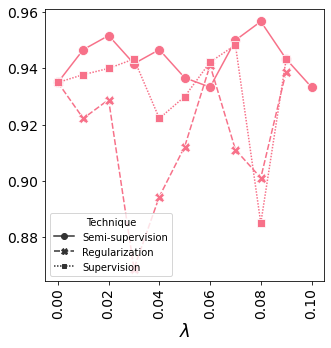

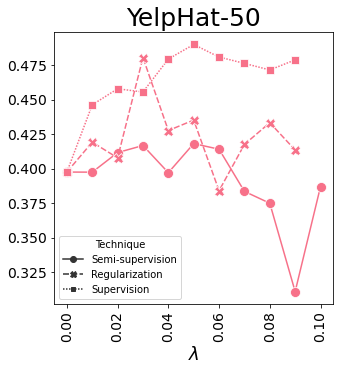

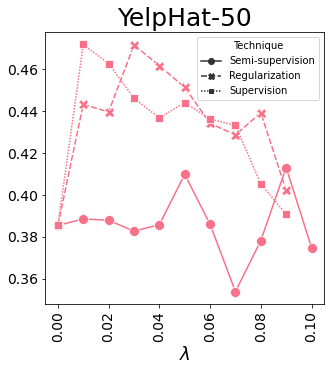

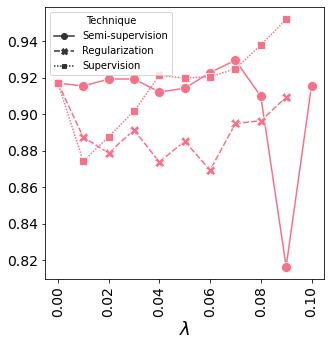

In [64]:
summary_semisupervision = pd.read_parquet(path.join(compare_dir, 'semi_supervision', 'yelphat50', 'summary.parquet'))
summary_supervision = pd.read_parquet(path.join(compare_dir, 'supervision', 'yelphat50', 'summary.parquet'))
summary_regularization = pd.read_parquet(path.join(compare_dir, 'regularization', 'yelphat50', 'summary.parquet'))

summary_semisupervision['lambda'] = summary_semisupervision['lambda_heuristic']
summary_semisupervision = summary_semisupervision[['data', 'lambda', 'a:AUPRC', 'a:AUPrecision', 'a:AURecall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_semisupervision['Technique'] = 'Semi-supervision'

summary_supervision['lambda'] = summary_supervision['lambda_supervise']
summary_supervision = summary_supervision[['data', 'lambda', 'a:AUPRC', 'a:AUPrecision', 'a:AURecall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_supervision['Technique'] = 'Supervision'
summary_supervision = summary_supervision[summary_supervision['y:fscore'] > 0.7]

summary_regularization['lambda'] = summary_regularization['lambda_entropy']
summary_regularization = summary_regularization[['data', 'lambda', 'a:AUPRC', 'a:AUPrecision', 'a:AURecall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_regularization['Technique'] = 'Regularization'

summary = pd.concat([summary_semisupervision, summary_regularization, summary_supervision])

dataset_fname = 'yelphat50'
dataset_title = 'YelpHat-50'

report_metrics = [
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' , 'fname': f'fscore_{dataset_fname}.png'},
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' , 'fname': f'auprc_{dataset_fname}.png'},
    {'y': 'a:AURecall', 'ylabel': 'Recall of attention map' , 'fname': f'recall_{dataset_fname}.png'},
    {'y': 'a:Specificity', 'ylabel': 'Specificity of attention map' , 'fname': f'specificity_{dataset_fname}.png'},
]

for metric in report_metrics:
    fig = plt.figure(figsize=(5, 5), clear=True)
    #graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], hue='Technique', 
    #                       marker='o',
    #                       markersize=10,
    #                        palette='husl')
    graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], color=colors[0], 
                           err_style=None,
                           #dodge=True,
                           markers=True, style='Technique', markersize=10)

    if metric['y'] in ['a:AUPRC', 'a:AURecall']:
        graphic.set_title(dataset_title, fontdict={'fontsize':25})
    plt.xlabel('$\lambda$', fontsize=18)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('', fontsize=18)
#    plt.ylabel(metric['ylabel'], fontsize=18)
    plt.savefig(path.join(tmp_path, metric['fname']), bbox_inches="tight")
    plt.show()

## Multi-scale

In [10]:
summary_dir = '/Users/dunguyen/Developer/server_backup/historic/2023-02-23/summary'
compare_dir = path.join(summary_dir, 'objective_learning', 'compare_techniques')
contextualize_dir = path.join(summary_dir, 'objective_learning', 'contextualization')

summary_regularization = pd.read_parquet(path.join(compare_dir, 'regularization', 'esnli', 'summary.parquet'))
summary_regularization = pd.concat([summary_regularization, pd.read_parquet(path.join(contextualize_dir, 'regularization', 'esnli', 'summary.parquet'))])

In [11]:
summary_regularization['n_lstm'] = summary_regularization['n_lstm'].fillna(summary_regularization['n_context'])
summary_regularization = summary_regularization[summary_regularization['n_lstm'] == 1]

In [12]:
summary_supervision = pd.read_parquet(path.join(compare_dir, 'supervision', 'esnli', 'summary.parquet'))
summary_supervision = pd.concat([summary_supervision, pd.read_parquet(path.join(contextualize_dir, 'supervision', 'esnli', 'summary.parquet'))])
summary_supervision

,concat_context,data,lambda_entropy,lambda_heuristic,lambda_lagrange,lambda_supervise,n_context,a:AUPRC,a:AUROC,a:Dice,a:IoU,a:Jaccard,a:Precision,a:Recall,a:Specificity,a:entropy,y:accuracy,y:fscore,a:AUPrecision,a:AURecall
run=0_esnli_lstm=1_lsup=0.07,True,esnli,0.0,0.0,0.0,0.07,1,0.502806,0.781801,0.469286,0.537766,0.309537,0.543327,0.444305,0.905038,0.550868,0.816979,0.816979,NaN,NaN
run=0_esnli_lstm=1_lsup=0.06,True,esnli,0.0,0.0,0.0,0.06,1,0.505112,0.783715,0.470445,0.538476,0.310077,0.544761,0.445736,0.905300,0.562192,0.816164,0.816164,NaN,NaN
run=2_esnli_lstm=1_lsup=0.0,True,esnli,0.0,0.0,0.0,0.00,1,0.446225,0.716220,0.437629,0.517448,0.273952,0.490328,0.432982,0.893841,0.780890,0.816572,0.816572,NaN,NaN
run=0_esnli_lstm=1_lsup=0.08,True,esnli,0.0,0.0,0.0,0.08,1,0.503797,0.782265,0.466427,0.536834,0.308375,0.547003,0.437829,0.906880,0.534556,0.815757,0.815757,NaN,NaN
run=1_esnli_lstm=1_lsup=0.1,True,esnli,0.0,0.0,0.0,0.10,1,0.505697,0.780170,0.465691,0.537548,0.308434,0.552756,0.432467,0.909995,0.509728,0.811889,0.811889,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run=0_esnli_lstm=5_lsup=0.3,True,esnli,0.0,0.0,0.0,0.30,5,0.438301,0.741521,0.453808,0.516579,0.290730,0.484562,0.426846,0.865677,0.550804,0.757736,0.757736,NaN,NaN
run=0_esnli_lstm=1_lsup=0.9,True,esnli,0.0,0.0,0.0,0.90,1,0.544566,0.806629,0.423307,0.528516,0.281609,0.640480,0.337504,0.949300,0.275026,0.799064,0.799064,NaN,NaN
run=1_esnli_lstm=3_lsup=1.0,True,esnli,0.0,0.0,0.0,0.40,3,0.498848,0.785426,0.428964,0.522851,0.283119,0.564609,0.368186,0.923500,0.404550,0.794076,0.794076,NaN,NaN
run=0_esnli_lstm=1_lsup=0.7,True,esnli,0.0,0.0,0.0,0.70,1,0.538594,0.806320,0.427303,0.529510,0.284851,0.629031,0.345976,0.946183,0.305590,0.806310,0.806310,NaN,NaN


In [13]:
summary_dir = '/Users/dunguyen/Developer/server_backup/historic/2023-02-23/summary'
compare_dir = path.join(summary_dir, 'objective_learning', 'compare_techniques')
contextualize_dir = path.join(summary_dir, 'objective_learning', 'contextualization')

summary_regularization = pd.read_parquet(path.join(compare_dir, 'regularization', 'esnli', 'summary.parquet'))
summary_regularization = pd.concat([summary_regularization, pd.read_parquet(path.join(contextualize_dir, 'regularization', 'esnli', 'summary.parquet'))])
summary_regularization['n_lstm'] = summary_regularization['n_lstm'].fillna(summary_regularization['n_context'])
summary_regularization = summary_regularization[summary_regularization['n_lstm'] == 1]

summary_supervision = pd.read_parquet(path.join(contextualize_dir, 'supervision', 'esnli', 'summary.parquet'))
summary_supervision = pd.concat([summary_supervision, pd.read_parquet(path.join(contextualize_dir, 'supervision', 'esnli', 'summary.parquet'))])
summary_supervision['n_lstm'] = summary_supervision['n_context']
summary_supervision = summary_supervision[summary_supervision['n_lstm'] == 1]
summary_supervision['a:Recall'] = summary_supervision['a:Recall'].fillna(summary_supervision['a:AURecall'])
summary_supervision = summary_supervision[~summary_supervision.index.duplicated(keep='first')]

summary_semisupervision = pd.read_parquet(path.join(compare_dir, 'semi_supervision', 'esnli', 'summary.parquet'))
summary_semisupervision = pd.concat([summary_semisupervision, pd.read_parquet(path.join(contextualize_dir, 'semi_supervision', 'esnli', 'summary.parquet'))])
summary_semisupervision['n_lstm'] = summary_semisupervision['n_context']
summary_semisupervision = summary_semisupervision[summary_semisupervision['n_lstm'] == 1]

summary_semisupervision['lambda'] = summary_semisupervision['lambda_heuristic']
summary_semisupervision = summary_semisupervision[['data', 'lambda', 'a:AUPRC', 'a:AUROC', 'a:Precision', 'a:Recall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_semisupervision['Technique'] = 'Semi-supervision'

summary_supervision['lambda'] = summary_supervision['lambda_supervise']
summary_supervision = summary_supervision[['data', 'lambda', 'a:AUPRC', 'a:AUROC', 'a:Precision', 'a:Recall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_supervision['Technique'] = 'Supervision'

summary_regularization['lambda'] = summary_regularization['lambda_entropy']
summary_regularization = summary_regularization[['data', 'lambda', 'a:AUPRC', 'a:AUROC', 'a:Precision', 'a:Recall', 'a:Specificity', 'y:fscore', 'a:entropy']]
summary_regularization['Technique'] = 'Regularization'

summary = pd.concat([summary_semisupervision, summary_regularization, summary_supervision])


In [15]:
metrics

['a:AUPRC',
 'a:AUROC',
 'a:Precision',
 'a:Recall',
 'a:Specificity',
 'y:fscore',
 'a:entropy']

In [14]:
grouped = summary.groupby(['data', 'Technique', 'lambda'])
metrics = [col for col in summary.columns if col not in ['data', 'Technique', 'lambda']]

df_new = grouped[metrics].agg(lambda x: f'{x.mean():.3f} ± {1.96 * x.sem():.3f}')


df_new

a:AUPRC        a:AUROC    a:Precision  \
data  Technique        lambda                                                
esnli Regularization   0.000   0.444 ± 0.004  0.715 ± 0.004  0.487 ± 0.004   
                       0.010   0.478 ± 0.011  0.746 ± 0.009  0.534 ± 0.011   
                       0.020   0.492 ± 0.003  0.762 ± 0.000  0.560 ± 0.010   
                       0.030   0.487 ± 0.005  0.756 ± 0.004  0.576 ± 0.004   
                       0.040     0.443 ± nan    0.714 ± nan    0.580 ± nan   
                       0.050     0.410 ± nan    0.683 ± nan    0.560 ± nan   
                       0.060     0.387 ± nan    0.670 ± nan    0.539 ± nan   
                       0.070     0.305 ± nan    0.589 ± nan    0.528 ± nan   
                       0.080     0.302 ± nan    0.583 ± nan    0.526 ± nan   
                       0.090     0.338 ± nan    0.619 ± nan    0.560 ± nan   
                       0.100   0.295 ± 0.013  0.578 ± 0.010      nan ± nan   
                       0.200   0.273 ± 0.047  0.541 ± 0.077      nan ± nan   
                       0.300   0.238 ± 0.034  0.501 ± 0.056      nan ± nan   
                       0.400   0.217 ± 0.000  0.494 ± 0.004      nan ± nan   
                       0.500   0.221 ± 0.004  0.477 ± 0.007      nan ± nan   
                       0.600   0.218 ± 0.002  0.488 ± 0.015    0.073 ± nan   
                       0.700   0.218 ± 0.002  0.493 ± 0.014      nan ± nan   
                       0.800   0.218 ± 0.000  0.502 ± 0.002      nan ± nan   
                       0.900   0.227 ± 0.018  0.502 ± 0.026      nan ± nan   
                       1.000   0.219 ± 0.000  0.509 ± 0.002      nan ± nan   
      Semi-supervision 0.000   0.442 ± 0.003  0.713 ± 0.003  0.486 ± 0.003   
                       0.005     0.461 ± nan    0.740 ± nan    0.492 ± nan   
                       0.010     0.466 ± nan    0.746 ± nan    0.494 ± nan   
                       0.015     0.460 ± nan    0.747 ± nan    0.487 ± nan   
                       0.020     0.450 ± nan    0.743 ± nan    0.476 ± nan   
                       0.040     0.436 ± nan    0.740 ± nan    0.464 ± nan   
                       0.050     0.429 ± nan    0.736 ± nan    0.455 ± nan   
                       0.060     0.421 ± nan    0.731 ± nan    0.450 ± nan   
                       0.070     0.411 ± nan    0.725 ± nan    0.441 ± nan   
                       0.080     0.411 ± nan    0.726 ± nan    0.439 ± nan   
                       0.090     0.404 ± nan    0.725 ± nan    0.433 ± nan   
                       0.100   0.431 ± 0.019  0.714 ± 0.006  0.471 ± 0.024   
                       0.200   0.445 ± 0.005  0.715 ± 0.004  0.489 ± 0.004   
                       0.300   0.443 ± 0.006  0.715 ± 0.003  0.487 ± 0.007   
                       0.400   0.441 ± 0.002  0.710 ± 0.002  0.485 ± 0.002   
                       0.500   0.443 ± 0.006  0.712 ± 0.004  0.486 ± 0.008   
                       0.600   0.438 ± 0.005  0.709 ± 0.006  0.481 ± 0.005   
                       0.700   0.442 ± 0.006  0.713 ± 0.004  0.482 ± 0.004   
                       0.800   0.441 ± 0.002  0.710 ± 0.002  0.485 ± 0.001   
                       0.900   0.444 ± 0.003  0.714 ± 0.003  0.488 ± 0.003   
                       1.000     0.437 ± nan    0.709 ± nan    0.482 ± nan   
      Supervision      0.000     0.446 ± nan    0.716 ± nan    0.490 ± nan   
                       0.100   0.506 ± 0.000  0.781 ± 0.002  0.553 ± 0.001   
                       0.200   0.513 ± 0.003  0.786 ± 0.004  0.569 ± 0.002   
                       0.300     0.517 ± nan    0.790 ± nan    0.575 ± nan   
                       0.400     0.525 ± nan    0.791 ± nan    0.598 ± nan   
                       0.500     0.500 ± nan    0.785 ± nan      nan ± nan   
                       0.600     0.495 ± nan    0.783 ± nan      nan ± nan   
                       0.700   0.537 ± 0.003  0.804 ± 0.004  0.624 ± 0.010   
                       0.800     0.541 ± nan    0.808 ± nan

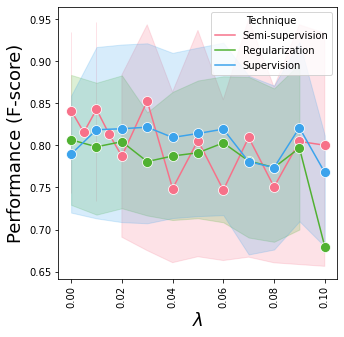

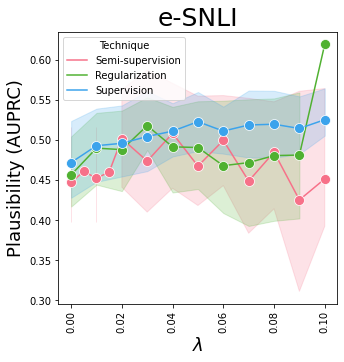

ValueError: Could not interpret value `a:AUROC` for parameter `y`

<Figure size 360x360 with 0 Axes>

In [13]:
dataset_fname = 'esnli'
dataset_title = 'e-SNLI'

report_metrics = [
    {'y': 'y:fscore', 'ylabel': 'Performance (F-score)' , 'fname': f'fscore_{dataset_fname}.png'},
    {'y': 'a:AUPRC', 'ylabel': 'Plausibility (AUPRC)' , 'fname': f'auprc_{dataset_fname}.png'},
    {'y': 'a:AUROC', 'ylabel': 'Plausibility (AUROC)' , 'fname': f'auroc_{dataset_fname}.png'},
    #{'y': 'a:Recall', 'ylabel': 'Recall of attention map' , 'fname': f'recall_{dataset_fname}.png'},
    {'y': 'a:Specificity', 'ylabel': 'Specificity of attention map' , 'fname': f'specificity_{dataset_fname}.png'},
]

for metric in report_metrics:
    fig = plt.figure(figsize=(5, 5), clear=True)
    graphic = sns.lineplot(data=summary, x=f'lambda', y=metric['y'], hue='Technique', 
                           marker='o',
                           markersize=10,
                            palette='husl')

    if metric['y'] in ['a:AUPRC', 'a:Recall']:
        graphic.set_title(dataset_title, fontdict={'fontsize':25})
    plt.xlabel('$\lambda$', fontsize=18)
    plt.xticks(rotation=90)
    plt.ylabel(metric['ylabel'], fontsize=18)
    plt.savefig(path.join(tmp_path, metric['fname']), bbox_inches="tight")
    plt.show()

## Check Inferences

In [56]:
import pandas as pd
from modules.utils import map_np2list

cache = path.join('/Users', 'dunguyen', 'Projects', 'IGRIDA', 'RUNS')
inference = pd.read_parquet(path.join(cache, 'logs', 'lstm_attention', 'semi_supervision', 'hatexplain', 'run=0_lstm=1_lheuris=0.10', 'predictions', 'batch_inference.parquet'))
inference = map_np2list(inference)

inference = inference[(inference['y_true'] != 'normal') & (inference['y_hat'] != 'normal')]

inference

,y_hat,a_hat,padding_mask,post_tokens,rationale,token_ids,a_true,heuristic,y_true,a_true_entropy,text_tokens
1,offensive,"[0.0014863661490380764, 0.002731864107772708, ...","[False, False, False, False, False, False, Fal...","[<user>, <user>, why, are, you, repeating, you...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[7, 7, 75, 13, 8, 11017, 295, 13, 8, 3, 213, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.000000,"[<user>, <user>, why, are, you, repeating, you..."
3,offensive,"[0.004087536130100489, 0.005296181421726942, 0...","[False, False, False, False, False, False, Fal...","[yeah, humnh, what, how, do, i, use, this, app...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[248, 1, 48, 60, 26, 6, 246, 22, 2196, 6, 83, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.000000,"[yeah, <unk>, what, how, do, i, use, this, app..."
4,offensive,"[0.011338232085108757, 0.0024279712233692408, ...","[False, False, False, False, False, False, Fal...","[education, or, marxist, indoctrination, since...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1755, 43, 1284, 5148, 255, 15, 10, 156, 3310,...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.015810275481549, 0.0, 0.0, 0.0, 0...",hatespeech,0.975546,"[education, or, marxist, indoctrination, since..."
9,hatespeech,"[0.00015058115241117775, 0.000804395938757807,...","[False, False, False, False, False, False, Fal...","[i, hope, there, are, not, many, of, my, fello...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[6, 308, 61, 13, 11, 148, 9, 31, 843, 157, 12,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.152...",hatespeech,0.654313,"[i, hope, there, are, not, many, of, my, fello..."
14,hatespeech,"[0.026391537860035896, 0.004017117898911238, 0...","[False, False, False, False, False, False, Fal...","[fun, fact, did, you, know, kardashian, is, ar...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[612, 362, 94, 8, 86, 18085, 10, 8749, 18, 27,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.003300330317122066, 0.0, 0.0, 0.0, 0.0, 0.0...",hatespeech,0.000000,"[fun, fact, did, you, know, kardashian, is, ar..."
...,...,...,...,...,...,...,...,...,...,...,...
502,offensive,"[0.012270854786038399, 0.0009261585655622184, ...","[False, False, False, False, False, False, Fal...","[yeah, i, know, but, this, is, one, part, of, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[248, 6, 86, 29, 22, 10, 59, 323, 9, 2, 415, 9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.705015,"[yeah, i, know, but, this, is, one, part, of, ..."
503,offensive,"[0.03526340425014496, 0.041232313960790634, 0....","[False, False, False, False, False, False, Fal...","[a, b, testing, is, a, bitch, when, you, can, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[3, 609, 3836, 10, 3, 63, 62, 8, 41, 11, 290, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.917600,"[a, b, testing, is, a, bitch, when, you, can, ..."
505,hatespeech,"[0.0021815230138599873, 0.0003383321163710207,...","[False, False, False, False, False, False, Fal...","[jews, have, not, and, will, never, be, white,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[58, 21, 11, 5, 37, 121, 20, 16, 1259, 40, 833...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",hatespeech,0.436209,"[jews, have, not, and, will, never, be, white,..."
506,hatespeech,"[0.0010098796337842941, 0.0003647598496172577,...","[False, False, False, False, False, False, Fal...","[how, can, you, get, rid, of, one, nigger, and...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[60, 41, 8, 57, 1986, 9, 59, 27, 5, 1288, 15, ...","[0, 0, 0, 0, 0

In [57]:
from modules.utils import hightlight

for c in ['heuristic', 'a_hat', 'rationale']:
    inference['hl.'+c] = inference.apply(lambda x: hightlight(x['post_tokens'], x[c]), axis=1)

inference.reset_index(drop=True, inplace=True) 

N_EXAMPLE = 10
for index, data in inference[:N_EXAMPLE].iterrows():
    display(HTML(
        '<table><tbody>' +\
        '<tr><td><b>Rationale</b></td><td>' + data['hl.rationale'] + '</td></tr>' +\
        '<tr><td><b>Heuristic</b></td><td>' + data['hl.heuristic'] + '</td></tr>' +\
        '<tr><td><b>Attention</b></td><td>' + data['hl.a_hat'] + '</td></tr>' +\
        '</tbody></table>'
    ))

Rationale,why are you repeating yourself are you a little retarded
Heuristic,why are you repeating yourself are you a little retarded
Attention,why are you repeating yourself are you a little retarded


Rationale,yeah humnh what how do i use this app i ’ m alittle retarded 👹
Heuristic,yeah humnh what how do i use this app i ’ m alittle retarded 👹
Attention,yeah humnh what how do i use this app i ’ m alittle retarded 👹


Rationale,education or marxist indoctrination since it is well established blacks are incapable of learning anything past the age of ten unless they are half white should not blacks go to a trade school upon age say learning how to pick cotton fruits and vegetables
Heuristic,education or marxist indoctrination since it is well established blacks are incapable of learning anything past the age of ten unless they are half white should not blacks go to a trade school upon age say learning how to pick cotton fruits and vegetables
Attention,education or marxist indoctrination since it is well established blacks are incapable of learning anything past the age of ten unless they are half white should not blacks go to a trade school upon age say learning how to pick cotton fruits and vegetables


Rationale,i hope there are not many of my fellow asians in sweden high chance of falling victim to islamic rape gangs in that country
Heuristic,i hope there are not many of my fellow asians in sweden high chance of falling victim to islamic rape gangs in that country
Attention,i hope there are not many of my fellow asians in sweden high chance of falling victim to islamic rape gangs in that country


Rationale,fun fact did you know kardashian is armenian for nigger lover
Heuristic,fun fact did you know kardashian is armenian for nigger lover
Attention,fun fact did you know kardashian is armenian for nigger lover


Rationale,not low class they enjoy to get fucked by muslims
Heuristic,not low class they enjoy to get fucked by muslims
Attention,not low class they enjoy to get fucked by muslims


Rationale,mfw i m trying to write an important term paper and some affirmative action ass hole starts blasting nigger music outside the window
Heuristic,mfw i m trying to write an important term paper and some affirmative action ass hole starts blasting nigger music outside the window
Attention,mfw i m trying to write an important term paper and some affirmative action ass hole starts blasting nigger music outside the window


Rationale,u spell it like a retard
Heuristic,u spell it like a retard
Attention,u spell it like a retard


Rationale,no that can not be we all know that muslim knife attacks have nothing to fo with religion
Heuristic,no that can not be we all know that muslim knife attacks have nothing to fo with religion
Attention,no that can not be we all know that muslim knife attacks have nothing to fo with religion


Rationale,always thought that nigger was a faggot
Heuristic,always thought that nigger was a faggot
Attention,always thought that nigger was a faggot


In [61]:
sum_heuris = inference['heuristic'].apply(lambda x: x.sum())

In [65]:
inference

,y_hat,a_hat,padding_mask,post_tokens,rationale,token_ids,a_true,heuristic,y_true,a_true_entropy,text_tokens,hl.heuristic,hl.a_hat,hl.rationale
0,offensive,"[0.0014863661490380764, 0.002731864107772708, ...","[False, False, False, False, False, False, Fal...","[<user>, <user>, why, are, you, repeating, you...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[7, 7, 75, 13, 8, 11017, 295, 13, 8, 3, 213, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.000000,"[<user>, <user>, why, are, you, repeating, you...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2..."
1,offensive,"[0.004087536130100489, 0.005296181421726942, 0...","[False, False, False, False, False, False, Fal...","[yeah, humnh, what, how, do, i, use, this, app...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[248, 1, 48, 60, 26, 6, 246, 22, 2196, 6, 83, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.000000,"[yeah, <unk>, what, how, do, i, use, this, app...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2..."
2,offensive,"[0.011338232085108757, 0.0024279712233692408, ...","[False, False, False, False, False, False, Fal...","[education, or, marxist, indoctrination, since...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1755, 43, 1284, 5148, 255, 15, 10, 156, 3310,...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.015810275481549, 0.0, 0.0, 0.0, 0...",hatespeech,0.975546,"[education, or, marxist, indoctrination, since...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2..."
3,hatespeech,"[0.00015058115241117775, 0.000804395938757807,...","[False, False, False, False, False, False, Fal...","[i, hope, there, are, not, many, of, my, fello...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[6, 308, 61, 13, 11, 148, 9, 31, 843, 157, 12,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.152...",hatespeech,0.654313,"[i, hope, there, are, not, many, of, my, fello...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2..."
4,hatespeech,"[0.026391537860035896, 0.004017117898911238, 0...","[False, False, False, False, False, False, Fal...","[fun, fact, did, you, know, kardashian, is, ar...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[612, 362, 94, 8, 86, 18085, 10, 8749, 18, 27,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.003300330317122066, 0.0, 0.0, 0.0, 0.0, 0.0...",hatespeech,0.000000,"[fun, fact, did, you, know, kardashian, is, ar...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,offensive,"[0.012270854786038399, 0.0009261585655622184, ...","[False, False, False, False, False, False, Fal...","[yeah, i, know, but, this, is, one, part, of, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[248, 6, 86, 29, 22, 10, 59, 323, 9, 2, 415, 9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.705015,"[yeah, i, know, but, this, is, one, part, of, ...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2...","<span style=""background-color:rgba(135, 206, 2..."
870,offensive,"[0.03526340425014496, 0.041232313960790634, 0....","[False, False, False, False, False, False, Fal...","[a, b, testing, is, a, bitch, when, you, can, ...","[0, 0, 1, 1, 1,

In [75]:
test_df = pd.read_parquet(path.join(cache, 'dataset','hatexplain', 'test.parquet'))
inference = pd.read_parquet(path.join(cache, 'logs', 'lstm_attention', 'semi_supervision', 'hatexplain', 'run=0_lstm=1_lheuris=0.10', 'predictions', 'batch_inference.parquet'))
test_df['label'] == inference['y_true']

ValueError: Can only compare identically-labeled Series objects

In [82]:
inference.sort_index()

,y_hat,a_hat,padding_mask,post_tokens,rationale,token_ids,a_true,heuristic,y_true,a_true_entropy,text_tokens
0,normal,"[0.17859023809432983, 0.041906315833330154, 0....","[False, False, False, False, False, False, Fal...","[<user>, men, can, not, be, raped, can, not, b...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7, 107, 41, 11, 20, 90, 41, 11, 20, 1342, 14,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal,0.000000,"[<user>, men, can, not, be, raped, can, not, b..."
0,normal,"[0.010696595534682274, 0.018938777968287468, 0...","[False, False, False, False, False, False, Fal...","[there, so, much, community, in, the, ghetto, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[61, 30, 170, 505, 12, 2, 69, 519, 191, 6707, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal,0.000000,"[there, so, much, community, in, the, ghetto, ..."
0,normal,"[0.02403060346841812, 0.0010359775042161345, 0...","[False, False, False, False, False, False, Fal...","[<user>, you, are, missing, an, essential, pre...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[7, 8, 13, 1694, 68, 7282, 20827, 1727, 133, 9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal,0.000000,"[<user>, you, are, missing, an, essential, pre..."
0,offensive,"[0.007051374763250351, 0.962151050567627, 0.00...","[False, False, False, False, False, False, Fal...","[should, illegal, aliens, be, counted, in, the...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[92, 113, 437, 20, 7090, 12, 2, 93, 4926, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal,0.000000,"[should, illegal, aliens, be, counted, in, the..."
1,offensive,"[0.0014863661490380764, 0.002731864107772708, ...","[False, False, False, False, False, False, Fal...","[<user>, <user>, why, are, you, repeating, you...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[7, 7, 75, 13, 8, 11017, 295, 13, 8, 3, 213, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.000000,"[<user>, <user>, why, are, you, repeating, you..."
...,...,...,...,...,...,...,...,...,...,...,...
509,normal,"[0.01752305030822754, 0.13812611997127533, 0.0...","[False, False, False, False, False, False, Fal...","[that, niggah, do, not, do, nothing, but, make...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[14, 7847, 26, 11, 26, 210, 29, 118, 8, 1226, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal,0.000000,"[that, niggah, do, not, do, nothing, but, make..."
510,normal,"[0.003206417663022876, 0.00982993096113205, 0....","[False, False, False, False, False, False, Fal...","[loved, 7, 0, comedy, you, could, say, nigga, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[2699, 1911, 380, 3969, 8, 181, 105, 168, 499,...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.212746,"[loved, 7, 0, comedy, you, could, say, nigga, ..."
510,offensive,"[0.035830166190862656, 0.8768014907836914, 0.0...","[False, False, False, False, False, False, Fal...","[<user>, big, head, and, being, a, faggot, in,...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[7, 268, 407, 5, 84, 3, 109, 12, 2, 872, 8131,...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",offensive,0.000000,"[<user>, big, head, and, being, a, faggot, in,..."
511,normal,"[0.3437546193599701, 0.1004924550652504, 0.005...","[False, False, False, False, False, False, Fal...","[<user>, same, we, should, just, kill, all, th...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[7, 153, 39, 92, 36, 147, 25, 2, 823, 21685, 9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",n

In [ ]:
test_df

,annotators.annotator_id,post_tokens,label,rationale,heuristic
0,"[9, 17, 64]","[<user>, men, can, not, be, raped, can, not, b...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[200, 199, 211]","[<user>, you, are, missing, an, essential, pre...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[233, 215, 202]","[<user>, <user>, why, are, you, repeating, you...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[206, 199, 203]","[<user>, <user>, well, she, ’, muslim, so, of,...",hatespeech,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[205, 223, 208]","[<user>, lol, not, me, i, don, ’, t, deal, wit...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
1919,"[225, 207, 204]","[we, hate, islam, and, we, will, mock, your, p...",hatespeech,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.858..."
1920,"[13, 4, 46]","[he, sounds, like, a, clothing, line, i, will,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1921,"[203, 209, 223]","[4, chan, is, retarded, and, so, are, you]",offensive,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.008463997146658984, 0.0, 0.0..."
1922,"[9, 6, 110]","[plenty, of, e, celebs, have, covered, israid,...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Inferences

In [3]:
from data_module.esnli_module import ESNLIDM
from model_module.lstm.dual_lstm_attention_module import DualLSTMAttentionModule
import torch

SERVER_DIR = '/Users/dunguyen/Projects/IGRIDA/RUNS'
#SERVER_DIR = '/srv/tempdd/dunguyen/RUNS'
LOG_PATH = path.join(SERVER_DIR, 'logs')
DATA_CACHE = path.join(SERVER_DIR, 'dataset')
MODEL_CACHE = path.join(SERVER_DIR, 'models')

m_kwargs = dict(
    n_context = 1, d_embedding=300
)

dm = ESNLIDM(cache_path=DATA_CACHE,
     batch_size=16)

dm.prepare_data()
dm.setup('test')

model = DualLSTMAttentionModule(cache_path=MODEL_CACHE,
    mode='exp',
    vocab=dm.vocab,
    concat_context=True,
    data='esnli',
    num_class=len(dm.LABEL_ITOS), **m_kwargs)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

600


/Users/dunguyen/venv/eps/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/Users/dunguyen/venv/eps/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/Users/dunguyen/venv/eps/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [5]:
from modules import * 
from tqdm.auto import tqdm

model_outputs = dict()

path_name_dict = {
    'Baseline': '/Users/dunguyen/Projects/JEANZAY/WORK/logs/objective_learning/compare_techniques/regularization/esnli/run=0_esnli_lstm=1_lheuris=0.0',
    '&lambda;=0.03': '/Users/dunguyen/Projects/JEANZAY/WORK/logs/objective_learning/compare_techniques/regularization/esnli/run=0_esnli_lstm=1_lheuris=0.03',
    '&lambda;=0.06': '/Users/dunguyen/Projects/JEANZAY/WORK/logs/objective_learning/compare_techniques/regularization/esnli/run=0_esnli_lstm=1_lheuris=0.06',
    '&lambda;=0.09': '/Users/dunguyen/Projects/JEANZAY/WORK/logs/objective_learning/compare_techniques/regularization/esnli/run=0_esnli_lstm=1_lheuris=0.09',
}
name = 'Baseline'

def html_render(model_outputs):
        html = ''
        table_len = len(model_outputs['GROUNDTRUTH']['Label'])
        for i in range(table_len):
            html += '<table>'
            html += '<tr><th></th>' # One xtra head for model's name
            for column_name in model_outputs['GROUNDTRUTH'].keys():
                html+= '<th>'+ column_name +'</th>'
            html += ' </tr>'
            for name, model_content in model_outputs.items():
                html += '<tr>'
                html += '<td><b>' + name + '</b></td>'

                for k, output in model_content.items():
                    displ = output[i] if output is not None else 'N/A'
                    if isinstance(displ, float):
                        displ = str(round(displ, 3))
                    html += '<td>' + displ + '</td>'

                html += '</tr>'

            html += '</table>'
        return html

N_BATCH = 2

    
with torch.no_grad():

    for idx, batch in enumerate(dm.test_dataloader()):
        
        if idx > N_BATCH : continue
        
        batch = dm.collate(batch)
        padding_mask = batch['padding_mask']
        
        

        tokens_premise = batch['premise_tokens']
        tokens_hypothesis = batch['hypothesis_tokens']
        
        
        labels = batch['label']

        groundtruth_premise = batch['premise_rationale']
        groundtruth_hypothesis = batch['hypothesis_rationale']
        
        # baseline
        model_outputs['GROUNDTRUTH'] = {
            'Premise': [hightlight(tokens, gt) for tokens, gt in zip(tokens_premise, groundtruth_premise)],
            'Hypothesis': [hightlight(tokens, gt) for tokens, gt in zip(tokens_hypothesis, groundtruth_hypothesis)],
            'Label': labels,
        }
        
        for name, model_path in path_name_dict.items():

            model_outpath = model_path + '/.out'
            model = DualLSTMAttentionModule.load_from_checkpoint(model_path + '/checkpoints/best.ckpt', 
                                                                 cache_path=MODEL_CACHE, 
                                                                 mode='dev', 
                                                                 vocab=dm.vocab,
                                                                 d_embedding=300,
                                                                 n_context=1,
                                                                concat_context=True)
            model.eval()

            y_hat, a_hat = model(premise_ids=batch['premise_ids'].to(device), 
                          hypothesis_ids=batch['hypothesis_ids'].to(device), 
                          premise_padding=padding_mask['premise'].to(device),
                          hypothesis_padding=padding_mask['hypothesis'].to(device))

            
            score = y_hat.softmax(-1)
            y_hat = y_hat.argmax(-1)
            
            a_hat['premise'] = a_hat['premise'].softmax(dim=1)
            a_hat['hypothesis'] = a_hat['hypothesis'].softmax(dim=1)
            att_premise_rescale = rescale(a_hat['premise'], padding_mask['premise'])
            att_hypothesis_rescale = rescale(a_hat['hypothesis'], padding_mask['hypothesis'])

            model_outputs[name] =  {
                'Premise': [hightlight(tokens, attentions) for tokens, attentions in zip(tokens_premise, att_premise_rescale)],
                'Hypothesis': [hightlight(tokens, attentions) for tokens, attentions in zip(tokens_hypothesis, att_hypothesis_rescale)],
                'Label': labels,
            }

display(HTML('<h3>Impact of Superivison on attention map </h3>'))

display(HTML(html_render(model_outputs)))

600


RuntimeError: Trying to create tensor with negative dimension -1: [-1, 600]

In [ ]:
from torch import nn
from modules.loss import IoU
from model_module import *
import os

def html_render(model_outputs):
        html = ''
        table_len = len(model_outputs['GROUNDTRUTH']['Label'])
        for i in range(table_len):
            html += '<table>'
            html += '<tr><th></th>' # One xtra head for model's name
            for column_name in model_outputs['GROUNDTRUTH'].keys():
                html+= '<th>'+ column_name +'</th>'
            html += ' </tr>'
            for name, model_content in model_outputs.items():
                html += '<tr>'
                html += '<td><b>' + name + '</b></td>'

                for k, output in model_content.items():
                    displ = output[i] if output is not None else 'N/A'
                    if isinstance(displ, float):
                        displ = str(round(displ, 3))
                    html += '<td>' + displ + '</td>'

                html += '</tr>'

            html += '</table>'
        return html

path_name_dict = {
    'Baseline': '/Users/dunguyen/Projects/IGRIDA/RUNS/logs/objective_learning/compare_techniques/supervision/esnli/run=0_esnli_lstm=1_lheuris=0.0',
    #'&lambda;=0.03': '/Users/dunguyen/Projects/IGRIDA/historic/2022-05-22/supervision_iou/lambda=0.003',   
    #'&lambda;=0.1': '/Users/dunguyen/Projects/IGRIDA/historic/2022-05-22/supervision_iou/lambda=0.5',   
}



display(HTML('<h3>Impact of Superivison on attention map </h3>'))

for id_batch, batch in enumerate(test_iter):
    
    # if id_batch > 5: break
    
    x, y_true = batch

    h_premise = x['heuristic_premise']
    h_hypothesis = x['heuristic_hypothesis']
    tokens_premise = x['tokens_premise']
    tokens_hypothesis = x['tokens_hypothesis']
    groundtruth_premise = x['groundtruth_premise']
    groundtruth_hypothesis = x['groundtruth_hypothesis']
    padding_mask = [x['padding_mask_premise'], x['padding_mask_hypothesis']]
    labels = x['label']

    h_premise = rescale(h_premise)
    h_hypothesis = rescale(h_hypothesis)


    # For each model, we save all of its predictions
    model_outputs = {}

    penalty = ['_'] * len(y_true)

    # baseline
    model_outputs['GROUNDTRUTH'] = {
        'Premise': [html_highlight(tokens, gt, padding_filter='[pad]') for tokens, gt in zip(tokens_premise, groundtruth_premise)],
        'Hypothesis': [html_highlight(tokens, gt, padding_filter='[pad]') for tokens, gt in zip(tokens_hypothesis, groundtruth_hypothesis)],
        'Label': labels,
    }

    # effect of different models
    for name, model_path in path_name_dict.items():

        model_outpath = model_path + '/.out'
        model = DualLSTMAttentionModule.load_from_checkpoint(model_path + '/checkpoints/best.ckpt', cache_path=cache_path+'models', mode='dev', vocab=vocab, reg_loss='iou')
        model.eval()

        # caching output
        y_hat, (att_premise, att_hypothesis) = model(x)

        flat_a_hat, flat_a_true = model.flatten_attention(
            a_hat=(att_premise, att_hypothesis),
            a_true=(groundtruth_premise, groundtruth_hypothesis),
            y_true=y_true,
            pad_mask=padding_mask,
            normalize='sigmoid'
        )

        #loss = [loss_fn(y_hat[i], y_true[i]).item() for i in range(len(y_hat))]
        if flat_a_true is None:
            penalty = ['N/A'] * len(y_hat)
        else:
            penalty = reg_loss_fn(flat_a_hat, flat_a_true)
            penalty = [penalty.item()] * len(y_hat)

        
        att_premise_rescale = rescale(torch.softmax(att_premise, axis=1))
        att_hypothesis_rescale = rescale(torch.softmax(att_hypothesis, axis=1))
            
        model_outputs[name] =  {
            'Premise': [html_highlight(tokens, attentions, padding_filter='[pad]') for tokens, attentions in zip(tokens_premise, att_premise_rescale)],
            'Hypothesis': [html_highlight(tokens, attentions, padding_filter='[pad]') for tokens, attentions in zip(tokens_hypothesis, att_hypothesis_rescale)],
            'Label': labels,
            # 'Loss': loss,
            #'Attention IoU': penalty
        }

    display(HTML(html_render(model_outputs)))